In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import re
import string

In [2]:
## count the number of characters
def count_chars(text):
    return len(text)

## count the number of words
def count_words(text):
    return len(text.split())

## count the number of sentences
def count_sent(text):
    return len(nltk.sent_tokenize(text))

## count the number of unique words within the tweet
def count_unique(text):
    return len(set(text.split()))

## count hashtags
def count_htags(text):
    return len(re.findall(r'(#w[A-Za-z0-9]*)', text))

## count capital letters
def count_capital_chars(text):
    count = 0
    for x in text:
        if x.isupper():
            count+=1
    return count

## count capital words
def count_capital_words(text):
    return sum(map(str.isupper, text.split()))

## count number of punctuations
def count_punctuations(text):
    d=dict()
    for i in string.punctuation:
        d[str(i)+' count']=text.count(i)
    return d

## count stopwords
def count_stopwords(text):
    ## not sure how to do
    return 0

In [3]:
    for dirname, _, filenames in os.walk('.\data'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

    train = pd.read_csv('./data/train.csv')
    test = pd.read_csv('./data/test.csv')
    print("load data done")
    print('test :' + str(test.shape))
    
    print('training: ' + str(train.shape))
    print('total keywords NA: ' + str(train.keyword.nunique()))
    print('total locations NA:' + str(train.location.nunique()))


    

load data done
test :(3263, 4)
training: (7613, 5)
total keywords NA: 221
total locations NA:3341


In [4]:
    # make feature columns
    train['char_count'] = train['text'].apply(lambda x:count_chars(x))
    train['word_count'] = train['text'].apply(lambda x:count_words(x))
    train['sent_count'] = train['text'].apply(lambda x:count_sent(x))
    train['cap_char_count'] = train['text'].apply(lambda x:count_capital_chars(x))
    train['cap_word_count'] = train['text'].apply(lambda x:count_capital_words(x))
    train['unique_word_count'] = train['text'].apply(lambda x:count_unique(x))
    train['htag_count'] = train['text'].apply(lambda x:count_htags(x))
    train['punct_count'] = train['text'].apply(lambda x:count_punctuations(x))
    # average word length
    train['avg_word_length'] = train['char_count']/train['word_count']
    # average sentence length
    train['avg_sentence_length'] = train['word_count']/train['sent_count']
    # fraction of unique to total words
    train['unique_v_words'] = train['unique_word_count']/train['word_count']
    # adding punctuation as features columns
    train_punct = pd.DataFrame(list(train.punct_count))
    train = pd.merge(train, train_punct, left_index=True, right_index=True)
    train.drop(columns=['punct_count'], inplace=True)
    
    test['char_count'] = test['text'].apply(lambda x:count_chars(x))
    test['word_count'] = test['text'].apply(lambda x:count_words(x))
    test['sent_count'] = test['text'].apply(lambda x:count_sent(x))
    test['cap_char_count'] = test['text'].apply(lambda x:count_capital_chars(x))
    test['cap_word_count'] = test['text'].apply(lambda x:count_capital_words(x))
    test['unique_word_count'] = test['text'].apply(lambda x:count_unique(x))
    test['htag_count'] = test['text'].apply(lambda x:count_htags(x))
    test['punct_count'] = test['text'].apply(lambda x:count_punctuations(x))
    test['avg_word_length'] = test['char_count']/train['word_count']
    test['avg_sentence_length'] = test['word_count']/train['sent_count']
    test['unique_v_words'] = test['unique_word_count']/train['word_count']
    test_punct = pd.DataFrame(list(test.punct_count))
    test = pd.merge(test, test_punct, left_index=True, right_index=True)
    test.drop(columns=['punct_count'], inplace=True)

In [5]:
print(train.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  char_count  word_count  sent_count  cap_char_count  cap_word_count  \
0       1          69          13           1              10               1   
1       1          38           7           2               5               0   
2       1         133          22           2               2               0   
3       1          65           8           1               1               0   
4       1          88          16           1               3               0   

   ...  [ count  \ count  ] count  ^ count  _ coun

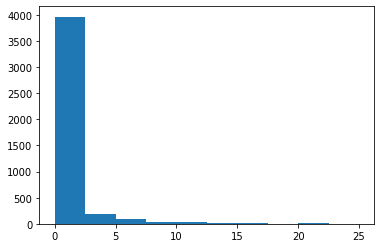

In [27]:
import matplotlib.pyplot as plt
category='cap_word_count'
xpoints0 = train.loc[train['target'] == 0][category]
plt.hist(xpoints0)
plt.show()

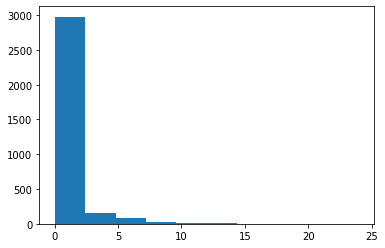

In [28]:
xpoints1 = train.loc[train['target'] == 1][category]
plt.hist(xpoints1)
plt.show()

In [29]:
import sklearn

In [68]:
from sklearn.linear_model import LogisticRegression
X = train[['char_count', 'word_count', 'sent_count', 'cap_char_count', 'cap_word_count']].to_numpy()
y = train['target']

In [69]:
clf = LogisticRegression().fit(X, y)

In [70]:
print(clf.predict(X))
print(y)

[0 0 0 ... 0 1 0]
0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64


In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(clf.predict(X), y))

[[3312 1746]
 [1030 1525]]


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)